In [23]:
import pandas
import matplotlib.pyplot as plt
import os
os.system("wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py")
os.system("wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv ")


1

In [15]:
data = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv ', parse_dates=['date'])

In [17]:
data

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [19]:
data = data[[d.month == 1 for d in data.date]].copy()


In [21]:
data

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25229,2017-01-27,0.00,54,37,False
25230,2017-01-28,0.00,52,37,False
25231,2017-01-29,0.03,48,37,True
25232,2017-01-30,0.02,45,40,True


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


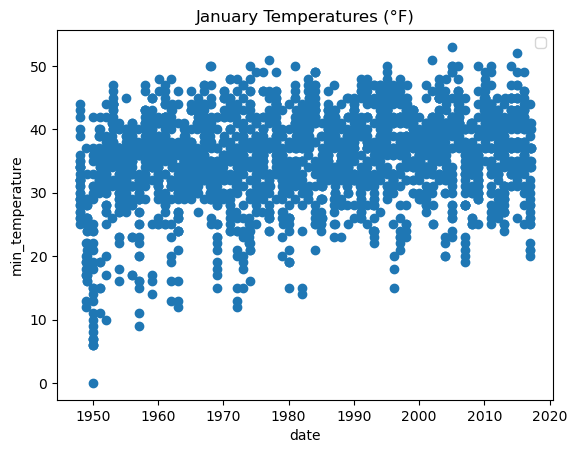

In [27]:
plt.scatter(data["date"], data["min_temperature"])

# add labels and legend
plt.xlabel("date")
plt.ylabel("min_temperature")
plt.title("January Temperatures (°F)")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


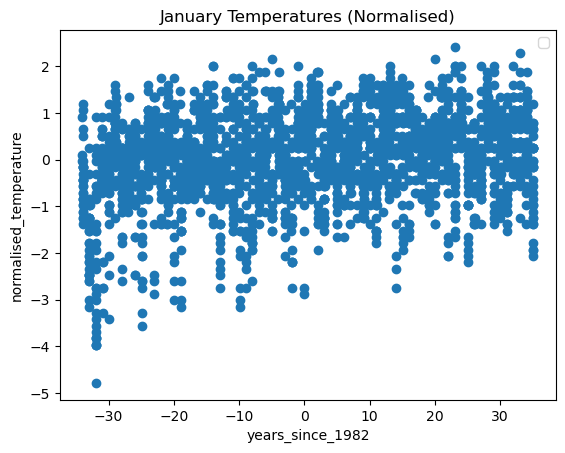

In [29]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You don't need to understand this code. We'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])

# Graph
plt.scatter(data["years_since_1982"], data["normalised_temperature"])
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperatures (Normalised)")
plt.legend()

In [31]:
class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

# Create our model ready to be trained
model = MyModel()

print("Model made!")

Model made!


In [41]:
MyModel.predict(date="2017-01-29")

TypeError: MyModel.predict() missing 1 required positional argument: 'self'

Model parameters before training: 0, 0
Model visualised before training:


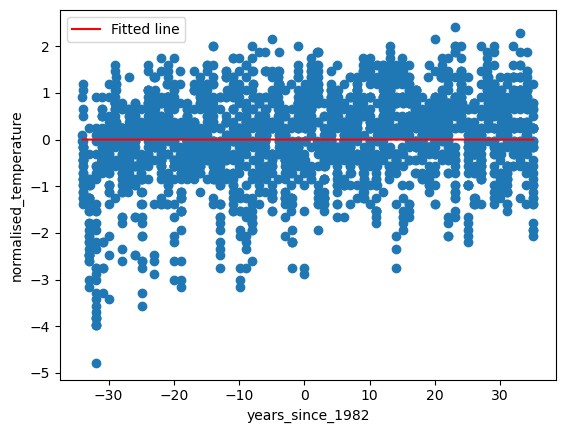

In [43]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

# Look at how well the model does before training
print("Model visualised before training:")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')

                                                 
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

In [45]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''

    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    # Convert to a single number that tells us how well the model did
    # (smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost

In [66]:
from opytimizer import MyOptimizer

# Create an optimizer
optimizer = MyOptimizer()

ImportError: cannot import name 'MyOptimizer' from 'opytimizer' (C:\Users\surya\condapy\Lib\site-packages\opytimizer\__init__.py)

In [54]:
pip3 install m0b_optimizer 

# Create an optimizer

SyntaxError: invalid syntax (2169228189.py, line 1)

In [56]:
pip install opytimizer

   ---------------------------------------- 0.0/230.2 kB ? eta -:--:--
   --------------------------------------- 230.2/230.2 kB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/207.6 kB ? eta -:--:--
   --------------------------------------- 207.6/207.6 kB 13.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
   ---------------------------------------- 56.2/56.2 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.3 kB ? eta -:--:--
   --------------------------------------- 204.3/204.3 kB 12.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/99.0 kB ? eta -:--:--
   ---------------------------------------- 99.0/99.0 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.4/3.9 MB 26.6 MB/s eta 0:00:01
   -------- ------------------------------- 0.9/3.9 MB 11.2 MB/s eta 0:00:01
   ------------ ------------